# Pokročilé grafy v Matplotlib

Různé typy grafů:
- Sloupcový graf (bar chart)
- Kumulativní sloupcový graf
- Histogram
- Koláčový graf (pie chart)
- Bodový graf (scatter plot)

Všechny grafy budeme vytvářet pomocí knihovny **Matplotlib**.

## Příprava dat

Budeme pracovat s meteorologickými daty z Varšavy za rok 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Načtení dat ze souboru
df = pd.read_csv('Plots_data/Meteo data.csv', sep=';', decimal='.')

# Seznam s počátečními dny měsíců
MONTHS_CHANGE = (0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335) 

# Seznam s názvy měsíců
MONTHS = ('Leden', 'Únor', 'Březen', 'Duben', 'Květen', 'Červen',
                'Červenec', 'Srpen', 'Září', 'Říjen', 'Listopad', 'Prosinec')

In [4]:
# Podíváme se na prvních pár řádků
df.head()

,Station code,Station name,Year,Month,Day,Average daily temperature,Average daily relative humidity,Average daily wind speed [m/s],Average daily cloud cover [oktas]
0,252200150,WARSZAWA-BIELANY,2020,1,1,2.4,89.5,5.0,8.0
1,252200150,WARSZAWA-BIELANY,2020,1,2,1.3,77.5,3.3,7.0
2,252200150,WARSZAWA-BIELANY,2020,1,3,2.3,75.3,3.7,5.3
3,252200150,WARSZAWA-BIELANY,2020,1,4,3.3,84.0,5.0,6.7
4,252200150,WARSZAWA-BIELANY,2020,1,5,0.7,79.5,3.3,0.7


### Názvy sloupců

In [5]:
df.columns

Index(['Station code ', 'Station name', 'Year', 'Month', 'Day',
       'Average daily temperature', 'Average daily relative humidity',
       'Average daily wind speed [m/s]', 'Average daily cloud cover [oktas]'],
      dtype='object')

In [9]:
mapping = {'Station code ' : 'code',
           'Station name' : 'name',
           'Average daily temperature' : 'avg_temp', 
           'Average daily relative humidity' :'avg_hum',
           'Average daily wind speed [m/s]' : 'avg_wind', 
           'Average daily cloud cover [oktas]' : 'avg_cloud'
          }
# Přejmenujte názvy sloupců
df.rename(columns = mapping, inplace = True)

In [10]:
df.head()

,code,name,Year,Month,Day,avg_temp,avg_hum,avg_wind,avg_cloud
0,252200150,WARSZAWA-BIELANY,2020,1,1,2.4,89.5,5.0,8.0
1,252200150,WARSZAWA-BIELANY,2020,1,2,1.3,77.5,3.3,7.0
2,252200150,WARSZAWA-BIELANY,2020,1,3,2.3,75.3,3.7,5.3
3,252200150,WARSZAWA-BIELANY,2020,1,4,3.3,84.0,5.0,6.7
4,252200150,WARSZAWA-BIELANY,2020,1,5,0.7,79.5,3.3,0.7


## Průměrné hodnoty podle měsíců

### Prumery po měsícich

In [11]:
# Vypočítejte průměrné hodnoty za jednotlivé měsíce
df.groupby('Month')

In [19]:
dfm = df.groupby('Month')[['avg_temp', 'avg_hum', 'avg_wind', 'avg_cloud']].mean()

In [20]:
dfm.head()

,avg_temp,avg_hum,avg_wind,avg_cloud
Month,,,,
1,2.890323,84.838710,3.374194,6.145161
2,4.293103,78.124138,3.417241,5.606897
3,5.067742,61.983871,2.967742,4.503226
4,9.570000,50.206667,2.870000,2.953333
5,12.109677,65.329032,2.580645,4.912903


---
### Sloupcový graf (Bar chart)

Sloupcový graf se používá k zobrazení kategorických dat. Metoda `plt.bar()` vytvoří svislé sloupce.

**Parametry metody plt.bar()**

- `x` - pozice sloupců na ose x
- `height` - výšky sloupců
- `width` - šířka sloupců
- `bottom` - úroveň, kde sloupce začínají (pro kumulativní grafy)
- `color` - barva sloupců
- `label` - popisek pro legendu

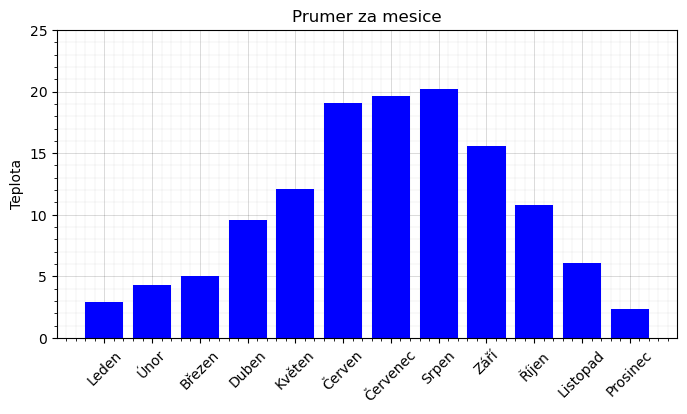

In [43]:
plt.figure(figsize=(8, 4))

plt.bar(range(1, 13), dfm['avg_temp'], color = 'blue', zorder = 2)
plt.title('Prumer za mesice')
plt.ylabel('Teplota')
plt.xticks(ticks = range(1, 13), labels = MONTHS, rotation = 45)
plt.yticks(range(0, 26, 5))

plt.minorticks_on()
plt.grid(which = 'major', linewidth = 0.5, color = 'black', alpha = 0.2, zorder = 0)
plt.grid(which = 'minor', linewidth = 0.3, color = 'gray', alpha = 0.2, zorder = 1)

plt.show()

## Počet oblačních a bezoblačních dnu

In [ ]:
# Vyfiltrujte data podle oblačnosti do dvou dataframu

In [44]:
df.head()

,code,name,Year,Month,Day,avg_temp,avg_hum,avg_wind,avg_cloud
0,252200150,WARSZAWA-BIELANY,2020,1,1,2.4,89.5,5.0,8.0
1,252200150,WARSZAWA-BIELANY,2020,1,2,1.3,77.5,3.3,7.0
2,252200150,WARSZAWA-BIELANY,2020,1,3,2.3,75.3,3.7,5.3
3,252200150,WARSZAWA-BIELANY,2020,1,4,3.3,84.0,5.0,6.7
4,252200150,WARSZAWA-BIELANY,2020,1,5,0.7,79.5,3.3,0.7


In [45]:
# Filtrování dat podle oblačnosti
df_nice = df[df['avg_cloud'] <= 4]
df_nice.head()

,code,name,Year,Month,Day,avg_temp,avg_hum,avg_wind,avg_cloud
4,252200150,WARSZAWA-BIELANY,2020,1,5,0.7,79.5,3.3,0.7
13,252200150,WARSZAWA-BIELANY,2020,1,14,3.8,79.5,2.7,3.0
14,252200150,WARSZAWA-BIELANY,2020,1,15,5.4,61.8,2.7,1.3
15,252200150,WARSZAWA-BIELANY,2020,1,16,5.1,75.8,3.0,1.0
20,252200150,WARSZAWA-BIELANY,2020,1,21,2.1,81.0,5.3,3.3


In [46]:
df_cloudy = df[df['avg_cloud'] > 4]
df_cloudy.head()

,code,name,Year,Month,Day,avg_temp,avg_hum,avg_wind,avg_cloud
0,252200150,WARSZAWA-BIELANY,2020,1,1,2.4,89.5,5.0,8.0
1,252200150,WARSZAWA-BIELANY,2020,1,2,1.3,77.5,3.3,7.0
2,252200150,WARSZAWA-BIELANY,2020,1,3,2.3,75.3,3.7,5.3
3,252200150,WARSZAWA-BIELANY,2020,1,4,3.3,84.0,5.0,6.7
5,252200150,WARSZAWA-BIELANY,2020,1,6,0.3,89.0,3.3,8.0


In [49]:
# Počet pěkných a špatných dnů v každém měsíci
n_nice = df_nice.groupby('Month')['avg_cloud'].count()

In [51]:
n_cloudy = df_cloudy.groupby('Month')['avg_cloud'].count()

In [50]:
# "Počet bezoblačných dnu podle měsíců:"
n_nice

Month
1      5
2      7
3     15
4     23
5     13
6     12
7     13
8     19
9     16
10     8
11     4
12     6
Name: avg_cloud, dtype: int64

In [52]:
# "Počet oblačných dnu podle měsíců:"
n_cloudy

Month
1     26
2     22
3     16
4      7
5     18
6     18
7     18
8     12
9     14
10    23
11    26
12    25
Name: avg_cloud, dtype: int64

---
### Kumulativní sloupcový graf

Kumulativní graf zobrazuje více datových řad nad sebou.

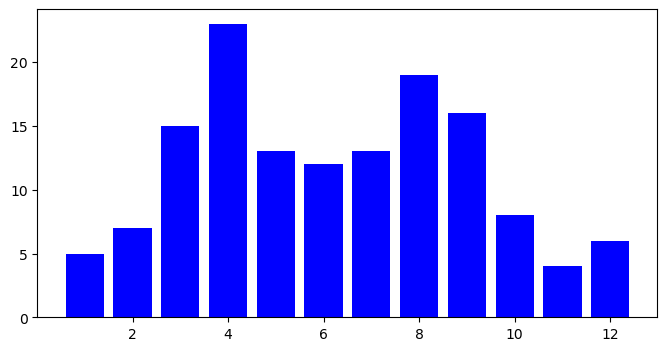

In [56]:
plt.figure(figsize=(8, 4))

# První vrstva sloupců - pěkné dny
plt.bar(range(1,13), n_nice, color = 'blue')

plt.show()

**Klíčový parametr: bottom**

Parametr `bottom` určuje, na jaké úrovni mají sloupce začínat. Pro kumulativní graf nastavíme `bottom` druhé vrstvy na hodnoty první vrstvy.

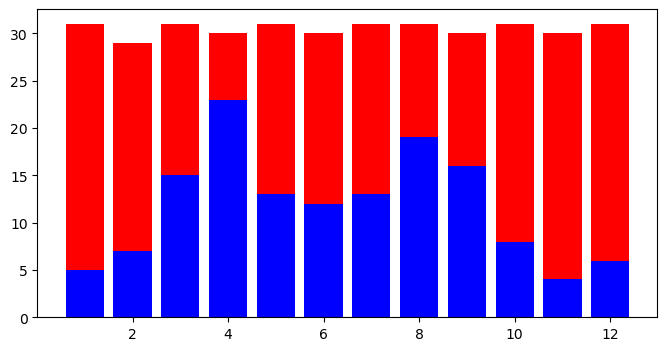

In [58]:
plt.figure(figsize=(8, 4))

# První vrstva sloupců - pěkné dny
plt.bar(range(1,13), n_nice, color = 'blue')

# Druhá vrstva sloupců - špatné dny (začínají tam, kde končí první vrstva)
plt.bar(range(1,13), n_cloudy, color = 'red', bottom = n_nice)

plt.show()

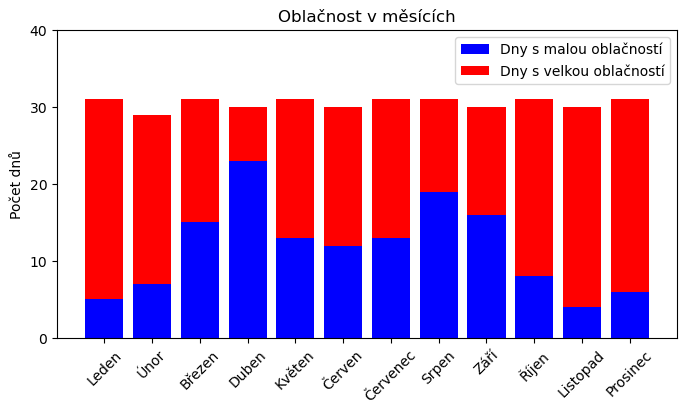

In [79]:
# pridej legendu, popisky

plt.figure(figsize=(8, 4))

# První vrstva sloupců - pěkné dny
plt.bar(range(1,13), n_nice, color = 'blue', label = 'Dny s malou oblačností')

# Druhá vrstva sloupců - špatné dny (začínají tam, kde končí první vrstva)
plt.bar(range(1,13), n_cloudy, color = 'red', bottom = n_nice, label = 'Dny s velkou oblačností')
plt.xticks(ticks = range(1,13), labels = MONTHS, rotation = 45)
plt.yticks(ticks = range(0,41,10))

plt.ylabel('Počet dnů')
plt.title('Oblačnost v měsících')
plt.legend()
plt.ylim(0,40)

plt.show()

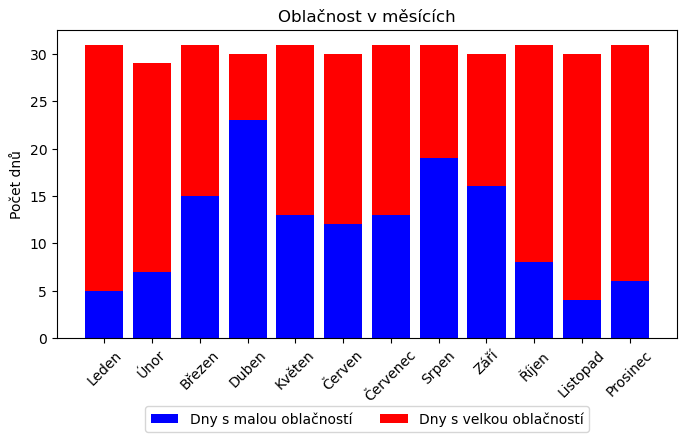

In [80]:
# posun legendu

plt.figure(figsize=(8, 4))

# První vrstva sloupců - pěkné dny
plt.bar(range(1,13), n_nice, color = 'blue', label = 'Dny s malou oblačností')

# Druhá vrstva sloupců - špatné dny (začínají tam, kde končí první vrstva)
plt.bar(range(1,13), n_cloudy, color = 'red', bottom = n_nice, label = 'Dny s velkou oblačností')
plt.xticks(ticks = range(1,13), labels = MONTHS, rotation = 45)
plt.ylabel('Počet dnů')
plt.title('Oblačnost v měsících')
plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.2), ncol = 2) 

plt.show()

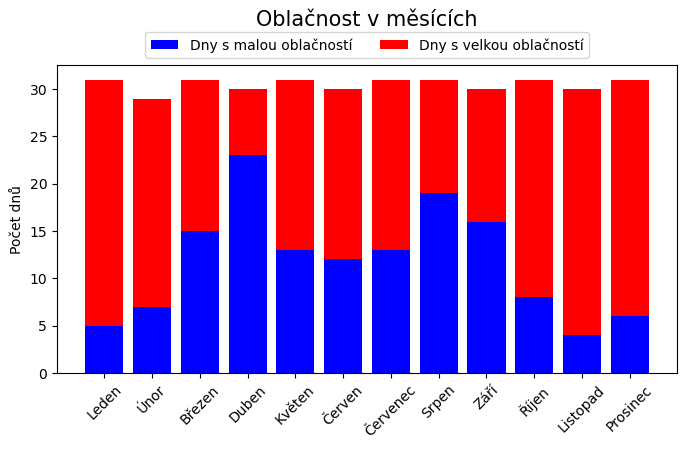

In [74]:
# legenda medzi titulkom a grafom

plt.figure(figsize=(8, 4))

# První vrstva sloupců - pěkné dny
plt.bar(range(1,13), n_nice, color = 'blue', label = 'Dny s malou oblačností')

# Druhá vrstva sloupců - špatné dny (začínají tam, kde končí první vrstva)
plt.bar(range(1,13), n_cloudy, color = 'red', bottom = n_nice, label = 'Dny s velkou oblačností')
plt.xticks(ticks = range(1,13), labels = MONTHS, rotation = 45)
plt.ylabel('Počet dnů')
plt.title('Oblačnost v měsících', y = 1.10, fontsize = 15)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, 1.0), ncol = 2) 

plt.show()

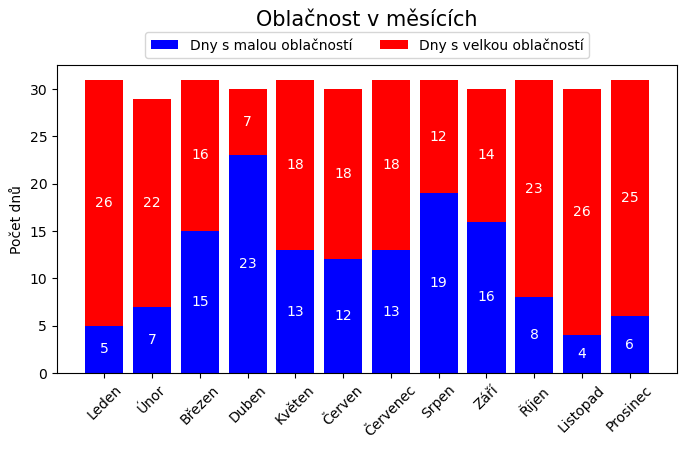

In [85]:
# Přidat popisky s počty
plt.figure(figsize=(8, 4))

# První vrstva sloupců - pěkné dny
bar_n = plt.bar(range(1,13), n_nice, color = 'blue', label = 'Dny s malou oblačností')

# Druhá vrstva sloupců - špatné dny (začínají tam, kde končí první vrstva)
bar_c = plt.bar(range(1,13), n_cloudy, color = 'red', bottom = n_nice, label = 'Dny s velkou oblačností')

plt.bar_label(bar_n, label_type='center', color = 'white')
plt.bar_label(bar_c, label_type='center', color = 'white')

plt.xticks(ticks = range(1,13), labels = MONTHS, rotation = 45)
plt.ylabel('Počet dnů')
plt.title('Oblačnost v měsících', y = 1.10, fontsize = 15)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, 1.0), ncol = 2) 

plt.show()

### Úloha: Oprav chybu v kódu

V následujícím kódu chybí důležitý parametr. Oprav ho tak, aby graf zobrazoval kumulativní data.

In [ ]:
# Oprav chybu:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), n_nice, color='green', label='Pěkné')
plt.bar(range(1, 13), n_cloudy, color='gray', label='Špatné') 
plt.legend()
plt.show()

---
## Rozložení teplot počas roka

### Histogram

Histogram zobrazuje rozložení spojitých dat do intervalů (binů). Ukazuje, kolik hodnot spadá do jednotlivých rozsahů.

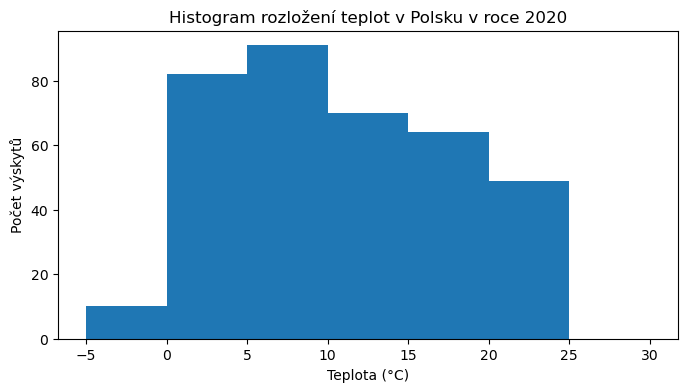

In [87]:
plt.figure(figsize=(8, 4))

plt.hist(df['avg_temp'], 
         bins=range(-5, 31, 5)
        )

plt.ylabel('Počet výskytů')
plt.xlabel('Teplota (°C)')
plt.title('Histogram rozložení teplot v Polsku v roce 2020')

plt.show()

(array([10., 82., 91., 70., 64., 49.]),
 array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <BarContainer object of 6 artists>)

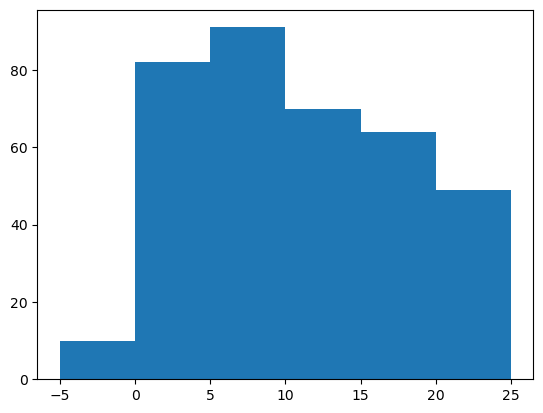

In [92]:
temp_hist = plt.hist(df['avg_temp'], bins=range(-5, 30, 5))
temp_hist

**Metoda `plt.hist()`**
Počty dnů v jednotlivých teplotních intervalech:

In [89]:
temp_hist[0]

array([10., 82., 91., 70., 64., 49.])

**Hranice intervalů:**

In [90]:
temp_hist[1]

array([-5.,  0.,  5., 10., 15., 20., 25.])

### Parametry metody plt.hist()

- `x` - data k rozdělení do intervalů
- `bins` - počet intervalů (číslo) nebo seznam hranic intervalů
- `cumulative` - pokud True, každý sloupec obsahuje součet všech předchozích
- `color` - barva histogramu
- `label` - popisek pro legendu
- `orientation` - 'vertical' nebo 'horizontal'

## Podíl dnu s ruznou vlhkostí

In [93]:
# Definice intervalů vlhkosti
bins = [0, 30, 60, 80, 90, 100]

In [94]:
# Rozdělení dat do skupin a spočítání
hum_cut = pd.cut(df['avg_hum'], bins=bins).value_counts()

**Počet dnů v jednotlivých kategoriích vlhkosti:**

In [95]:
hum_cut

avg_hum
(60, 80]     138
(80, 90]      89
(30, 60]      73
(90, 100]     66
(0, 30]        0
Name: count, dtype: int64

---
### Koláčový graf (Pie chart)

Koláčový graf zobrazuje podíly jednotlivých kategorií na celku. Nejprve připravíme data - rozdělíme vlhkost do 5 skupin.

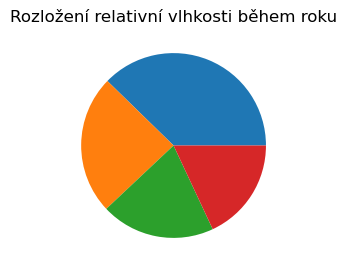

In [96]:
plt.figure(figsize=(3, 3))

plt.pie(hum_cut) 

plt.title('Rozložení relativní vlhkosti během roku')
plt.show()

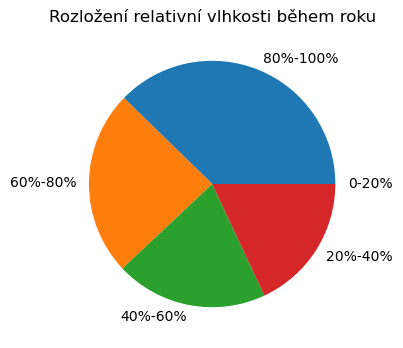

In [98]:
plt.figure(figsize=(4, 4))

# přidej labely___ '80%-100%', '60%-80%', '40%-60%', '20%-40%', '0-20%'
plt.pie(hum_cut,
       labels = ['80%-100%', '60%-80%', '40%-60%', '20%-40%', '0-20%']) 
plt.title('Rozložení relativní vlhkosti během roku')

plt.show()

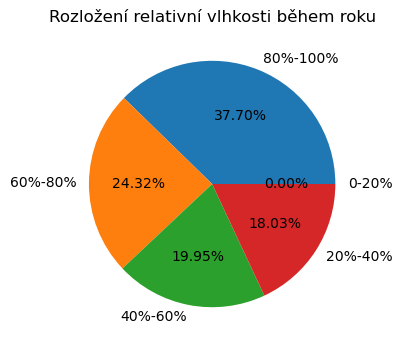

In [104]:
# početnost v procentách

plt.figure(figsize=(4, 4))
# přidej labely___ '80%-100%', '60%-80%', '40%-60%', '20%-40%', '0-20%'
plt.pie(hum_cut,
       labels = ['80%-100%', '60%-80%', '40%-60%', '20%-40%', '0-20%'],
       autopct='%1.2f%%') 

plt.title('Rozložení relativní vlhkosti během roku')
plt.show()


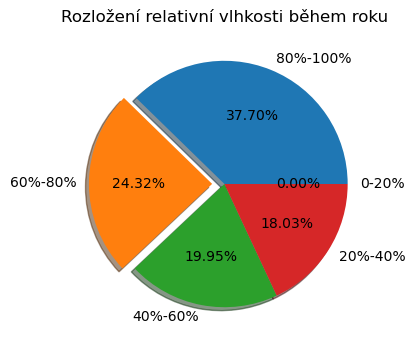

In [111]:
# se stínem a povytáhnutím
plt.figure(figsize=(4, 4))
# přidej labely___ '80%-100%', '60%-80%', '40%-60%', '20%-40%', '0-20%'
plt.pie(hum_cut,
       labels = ['80%-100%', '60%-80%', '40%-60%', '20%-40%', '0-20%'],
       autopct='%1.2f%%',
       explode = [0, 0.1, 0, 0, 0],
       shadow=True) 

# plt.legend(loc='lower center')
plt.title('Rozložení relativní vlhkosti během roku')
plt.show()


**Parametry metody `plt.pie()`**

- `x` - velikosti jednotlivých dílů
- `labels` - popisky dílů
- `explode` - "vytažení" dílů z koláče (0 = nevytažený)
- `autopct` - formát zobrazení procent
- `colors` - barvy jednotlivých dílů
- `shadow` - přidá stín
- `radius` - poloměr koláče (výchozí je 1)

### Úloha: Doplň kód

Doplň chybějící parametr tak, aby se zobrazila procenta na koláčovém grafu.

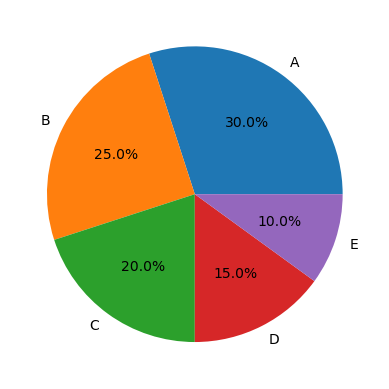

In [115]:
# Doplň parametr pro zobrazení procent:
data = [30, 25, 20, 15, 10]
labels = ['A', 'B', 'C', 'D', 'E']

plt.pie(data, 
        labels=labels,
        autopct='%1.1f%%'
       )  
plt.show()

---
## Pruběh teplot počas roka

---
### Bodový graf (Scatter plot)

Bodový graf zobrazuje vztah mezi dvěma proměnnými. Každý bod může mít jinou velikost a barvu.

In [117]:
df.head()

,code,name,Year,Month,Day,avg_temp,avg_hum,avg_wind,avg_cloud
0,252200150,WARSZAWA-BIELANY,2020,1,1,2.4,89.5,5.0,8.0
1,252200150,WARSZAWA-BIELANY,2020,1,2,1.3,77.5,3.3,7.0
2,252200150,WARSZAWA-BIELANY,2020,1,3,2.3,75.3,3.7,5.3
3,252200150,WARSZAWA-BIELANY,2020,1,4,3.3,84.0,5.0,6.7
4,252200150,WARSZAWA-BIELANY,2020,1,5,0.7,79.5,3.3,0.7


In [116]:
df.index

RangeIndex(start=0, stop=366, step=1)

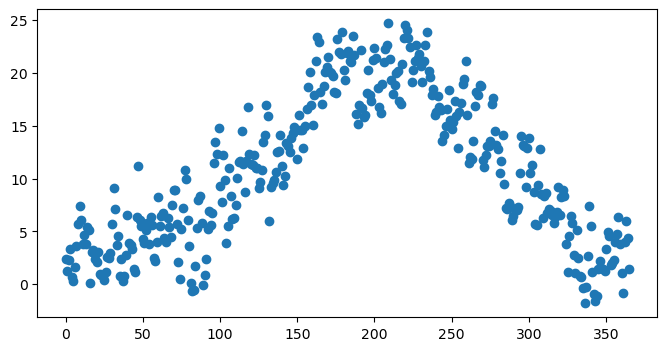

In [118]:
plt.figure(figsize=(8,4))

# jednoduchy scatter
plt.scatter(df.index, df['avg_temp'])

plt.show()

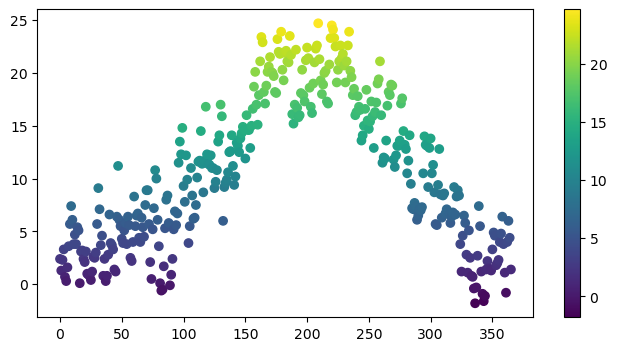

In [122]:
# Barva podle teploty
# Zobrazí barevnou škálu
plt.figure(figsize=(8,4))

# jednoduchy scatter
plt.scatter(df.index, df['avg_temp'],
            c=df['avg_temp'])
plt.colorbar()

plt.show()

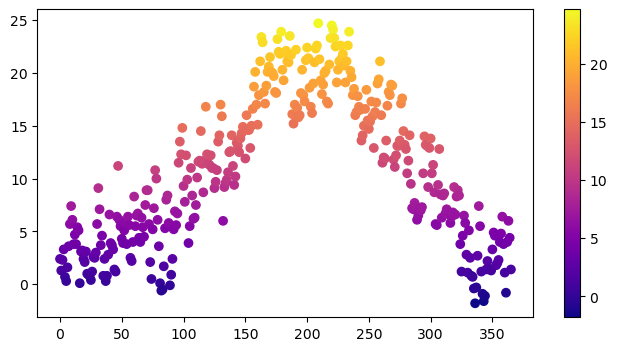

In [123]:
# Jiná barva
plt.figure(figsize=(8,4))

# jednoduchy scatter
plt.scatter(df.index, df['avg_temp'],
            c=df['avg_temp'],
            cmap='plasma')
plt.colorbar()

plt.show()

In [54]:
# Seznam počátečních dnů měsíců
MONTHS_CHANGE = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

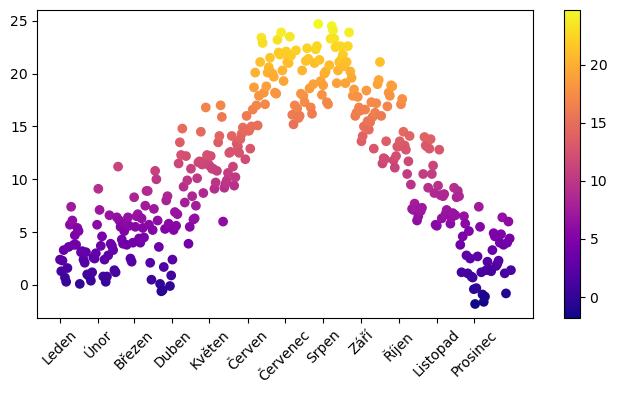

In [126]:
# Mesíce na ose, rotace
plt.figure(figsize=(8,4))

# jednoduchy scatter
plt.scatter(df.index, df['avg_temp'],
            c=df['avg_temp'],
            cmap='plasma')
plt.colorbar()

plt.xticks(ticks = MONTHS_CHANGE, labels = MONTHS, rotation = 45)
plt.show()

**Parametry metody `plt.scatter()`**

- `x` - x-ové souřadnice bodů
- `y` - y-ové souřadnice bodů
- `s` - velikost bodů
- `c` - barva bodů (může být seznam čísel pro barevnou mapu)
- `cmap` - barevná mapa
- `marker` - tvar bodu
- `alpha` - průhlednost bodů

**Různé velikosti bodů**

Parametr `s` určuje plochu bodu. Ukázka na syntetických datech:

In [131]:
x = [0, 2, 4, 6, 8, 10]
y = [0] * len(x)
s = [20 * 4**n for n in range(len(x))]  # Exponenciálně rostoucí velikost

In [132]:
x

[0, 2, 4, 6, 8, 10]

In [133]:
y

[0, 0, 0, 0, 0, 0]

In [130]:
print("Velikosti bodů:")
print(s)

Velikosti bodů:
[20, 80, 320, 1280, 5120, 20480]


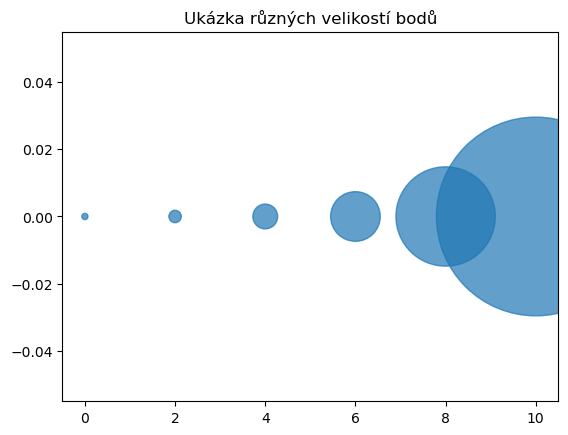

In [134]:
plt.scatter(x, y, s=s, alpha=0.7)
plt.title('Ukázka různých velikostí bodů')
plt.show()

### Úloha: Doplň

Oprav kód tak, aby body byly barevně rozlíšeny, přidej zobrazení barevní škály

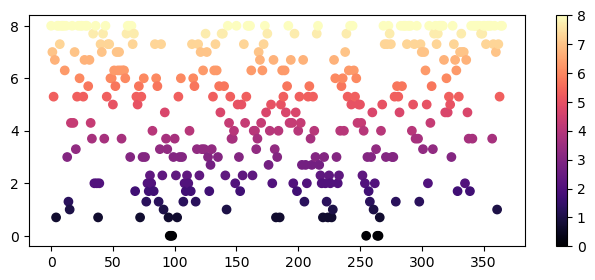

In [139]:
# Přidej metodu pro zobrazení barevné škály:
plt.figure(figsize=(8, 3))
plt.scatter(df.index, 
            df['avg_cloud'],
            c = df['avg_cloud'],
            cmap = 'magma'
           )
plt.colorbar()
plt.show()

---
## Praktické úlohy

### Úloha 1: Migrace

Načti ze souboru **Population in Poland - projections.xlsx** z listu **natural and migratory movement** hodnoty ze sloupce 'Foreign permanent migration - Balance'. Zobraz je ve sloupcovém grafu.

Pod každý sloupec přidej popisek s rokem.

In [140]:
# Tvůj kód zde:
df = pd.read_excel('Plots_data/Population in Poland - projections.xlsx', sheet_name='natural and migratory movement')

In [141]:
df.head()

,Year,Population on Dec 31,Natural increase - Births,Natural decrease - Deaths,Foreign permanent migration - Immigration,Foreign permanent migration - Emigration,Foreign permanent migration - Balance
0,2014,38005614,375160,376467,46129,54960,-8831
1,2015,38001529,376407,375377,47542,52657,-5115
2,2016,38001253,375756,379681,56045,52396,3649
3,2017,37989781,373569,383488,50552,52105,-1553
4,2018,37973268,370033,386849,52063,51760,303


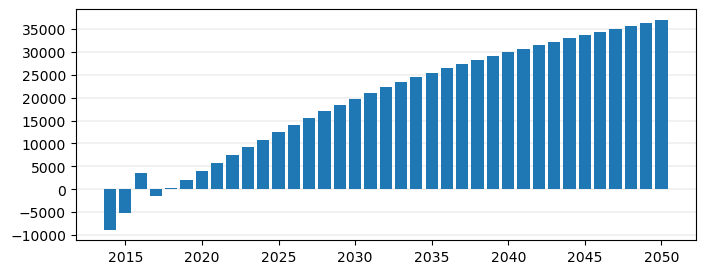

In [162]:
plt.figure(figsize=(8,3))
plt.bar(df['Year'], df['Foreign permanent migration - Balance'], zorder = 2)

plt.grid(which='major', axis = 'y', color = 'grey', alpha = 0.5, linewidth = 0.3, zorder = 0)

plt.yticks(range(-10000, 40000, 5000))

plt.show()

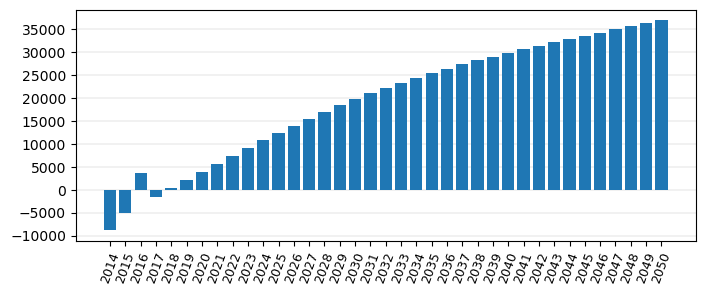

In [164]:
plt.figure(figsize=(8,3))
plt.bar(df.index, df['Foreign permanent migration - Balance'], zorder = 2)

plt.grid(which='major', axis = 'y', color = 'grey', alpha = 0.5, linewidth = 0.3, zorder = 0)
plt.yticks(range(-10000, 40000, 5000))
plt.xticks(ticks = df.index, labels = df['Year'], rotation = 70, fontsize = 9)

plt.show()

### Úloha 2: Věkové skupiny

Ze souboru **Population in Poland - projections.xlsx** z listu **5-year age groups** načti data pro rok 2021. Zobraz je na kumulativním sloupcovém grafu.

Přidej legendu, která vysvětluje, která část sloupce představuje ženy a která muže.

Pod každý sloupec přidej popisek s věkovou skupinou.

In [165]:
# Tvůj kód zde:
df = pd.read_excel('Plots_data/Population in Poland - projections.xlsx', sheet_name='5-year age groups')

In [166]:
df.head()

,Year,Age,Total,Men,Women
0,2014,0-4,1926441,990515,935926
1,2014,5-9,1998406,1024154,974252
2,2014,10-14,1789943,918424,871519
3,2014,15-19,2024374,1036453,987921
4,2014,20-24,2507493,1278725,1228768


In [167]:
df = df[df['Year']==2021]

In [170]:
df.shape

(21, 5)

In [175]:
df.shape[0]

21

In [176]:
len(df)

21

In [177]:
range(len(df))

range(0, 21)

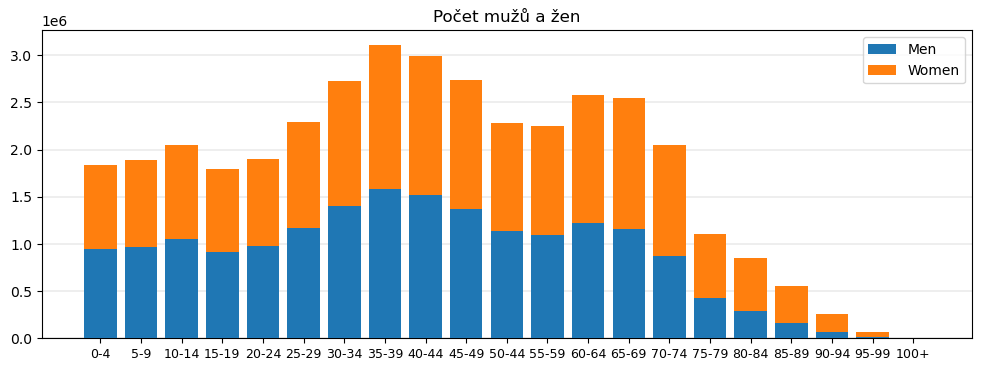

In [188]:
plt.figure(figsize=(12,4))

plt.bar(range(len(df)), 
        df['Men'], 
        label = 'Men',
        zorder = 3
       )
plt.bar(range(len(df)), 
        df['Women'], 
        bottom = df['Men'], 
        label = 'Women',
        zorder = 3
       )
plt.legend()
plt.grid(which = 'major', axis = 'y', linewidth=0.3, zorder = 0)
plt.title('Počet mužů a žen')
plt.xticks(ticks = range(len(df)), labels = df['Age'], fontsize = 9)
plt.show()

### Úloha 3: Občanský rozpočet Wroclawi

V souboru **wpb_votes_list_2019.csv** najdeš data o hlasování v rámci občanského rozpočtu města Wroclaw.

Načti tato data a zobraz histogram věku voličů - zobraz sloupce pokrývající 5leté rozsahy: voliči ve věku 18 až 23, 24 až 28, atd. (až do 100 let - předpokládáme, že to je maximální věk voličů).

In [189]:
# Tvůj kód zde:
df = pd.read_csv('Plots_data/wpb_votes_list_2019.csv')

In [190]:
df.head()

,No,Date,Age,Sex,Post_Code,Source,Local,General
0,1,"9:01:21, 20-09-2019",33,F,54-117,I,256,132
1,2,"9:01:32, 20-09-2019",38,F,54-131,I,323,255
2,3,"9:02:28, 20-09-2019",32,F,54-107,I,256,132
3,4,"9:02:44, 20-09-2019",36,M,53-339,I,4,5
4,5,"9:02:51, 20-09-2019",31,M,50-231,I,108,120


In [191]:
range(18, 101, 5)

range(18, 101, 5)

In [200]:
b = list(range(18, 101, 5))
b

[18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78, 83, 88, 93, 98]

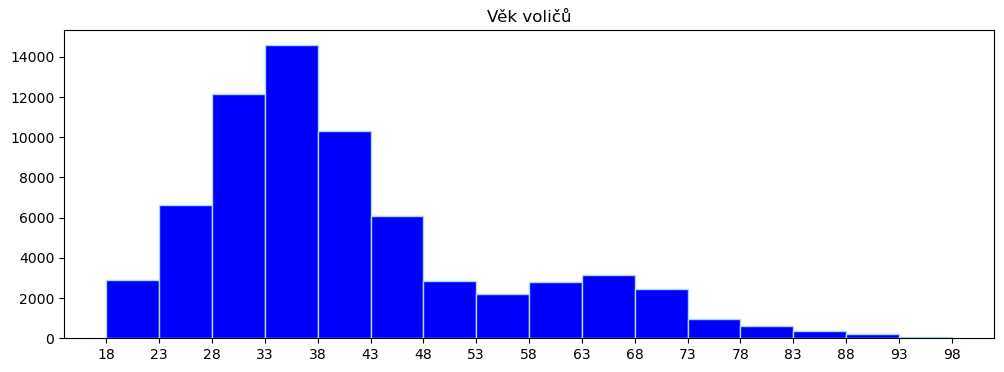

In [203]:
plt.figure(figsize=(12,4))

plt.hist(df['Age'], 
         bins = b,
         color = 'blue',
         edgecolor = 'lightblue'
        )
plt.xticks(b)

plt.title('Věk voličů')
plt.show()

---
## Přehled použitých metod a funkcí

| Metoda/Funkce | Popis |
|---------------|-------|
| `plt.figure(figsize=(šířka, výška))` | Vytvoří nový graf s danou velikostí |
| `plt.bar(x, height, ...)` | Vytvoří sloupcový graf |
| `plt.hist(x, bins=...)` | Vytvoří histogram |
| `plt.pie(x, labels=..., ...)` | Vytvoří koláčový graf |
| `plt.scatter(x, y, ...)` | Vytvoří bodový graf |
| `plt.xticks(pozice, popisky)` | Nastaví popisky na ose x |
| `plt.yticks(pozice)` | Nastaví značky na ose y |
| `plt.xlabel(text)` | Přidá popisek osy x |
| `plt.ylabel(text)` | Přidá popisek osy y |
| `plt.title(text)` | Přidá nadpis grafu |
| `plt.legend()` | Zobrazí legendu |
| `plt.grid()` | Přidá mřížku |
| `plt.minorticks_on()` | Zapne vedlejší značky os |
| `plt.colorbar()` | Zobrazí barevnou škálu |
| `plt.show()` | Zobrazí graf |
| `plt.bar_label()` | Přidá popisky s počty|
| `pd.cut(data, bins)` | Rozdělí data do intervalů |
| `df.groupby(sloupec).size()` | Spočítá počet řádků v každé skupině |
| `df.groupby(sloupec).mean()` | Vypočítá průměr pro každou skupinu |